In [1]:
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Load the dataset from the text file
data = np.loadtxt('YearPredictionMSD.txt', delimiter=',')


# Split the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2)
test_data, val_data = train_test_split(test_data, test_size=0.5)

# Separate the features and target variable in the train set
X_train = train_data[:, 1:]  # Exclude the first column (year)
y_train = train_data[:, 0]  # First column is the year

# Separate the features and target variable in the test set
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

X_val = val_data[:, 1:]
y_val = val_data[:, 0]



In [15]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate':[0.001,0.01,0.1],
    'min_samples_leaf':[500,1000,1500,2000],
    'l2_regularization':[0,0.2],
    'max_iter':[1000]
}

In [16]:
# Create the Lin Reg model
model = HistGradientBoostingRegressor()

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2',n_jobs=-1,cv=5)
grid_search.fit(X_val, y_val)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_



KeyboardInterrupt: 

In [11]:
# Train the best model
best_model.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.2, learning_rate=0.01,
                              max_iter=1000, min_samples_leaf=400)

In [12]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and R-squared score
print("Best Hyperparameters:", best_params)
print("Best R-squared score:", r2)

Best Hyperparameters: {'l2_regularization': 0.2, 'learning_rate': 0.01, 'max_iter': 1000, 'min_samples_leaf': 400}
Best R-squared score: 0.32425657158712173


Text(0.5, 1.0, 'Actual vs Predicted Values')

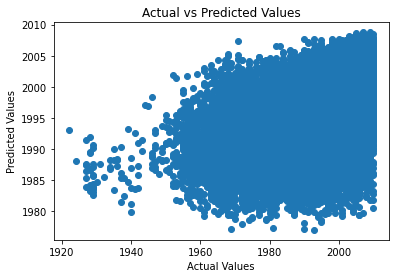

In [13]:
# Create scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [14]:
# Save the scatter plot as an image file
plt.savefig('scatter_plot.png')

<Figure size 432x288 with 0 Axes>